# Line intersection

Solving the Classical Problem of Line intersection through 3 approaches. 

### GUI always makes it better

> **Note**: Define the testcases carefully. 


Lines intersect.
Intersection point: (5.0, 10.0)


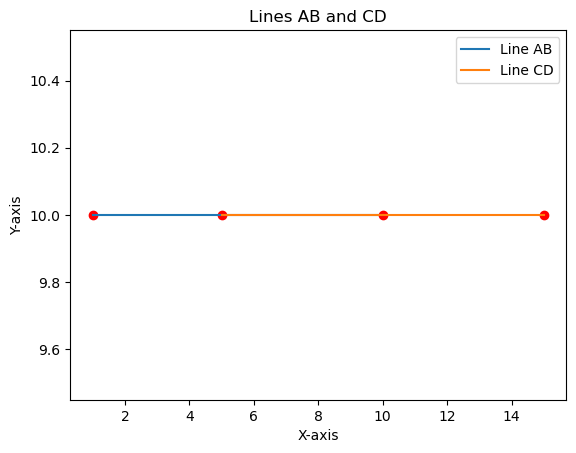

In [11]:
import matplotlib.pyplot as plt

def check_intersection(a, b, c, d):
    # Vectors representing the lines AB and CD
    vector_ab = (b[0] - a[0], b[1] - a[1])
    vector_cd = (d[0] - c[0], d[1] - c[1])

    # Cross product of vectors to check for parallel lines
    cross_product = vector_ab[0] * vector_cd[1] - vector_ab[1] * vector_cd[0]

    if cross_product == 0:
        # Lines are parallel, check for colinearity and overlap
        vector_ca = (a[0] - c[0], a[1] - c[1])
        # Check if line CD is completely on line AB
        if vector_ab[0] * vector_ca[1] - vector_ab[1] * vector_ca[0] == 0:
            return True, (c[0], c[1])  # Lines are colinear and overlap
        return False, None  # Lines are parallel and non-overlapping

    # Vector from C to A
    vector_ca = (a[0] - c[0], a[1] - c[1])

    # t and u are parameters for the lines AB and CD, respectively
    t = (vector_cd[0] * vector_ca[1] - vector_cd[1] * vector_ca[0]) / cross_product
    u = (vector_ab[0] * vector_ca[1] - vector_ab[1] * vector_ca[0]) / cross_product

    # Check if intersection point lies on both line segments
    if 0 <= t <= 1 and 0 <= u <= 1:
        x_intersection = a[0] + t * vector_ab[0]
        y_intersection = a[1] + t * vector_ab[1]
        return True, (x_intersection, y_intersection)

    return False, None

# Input four points (x, y)
a = tuple(map(float, input("Enter point A (x, y): ").split()))
b = tuple(map(float, input("Enter point B (x, y): ").split()))
c = tuple(map(float, input("Enter point C (x, y): ").split()))
d = tuple(map(float, input("Enter point D (x, y): ").split()))

# Check if lines intersect
intersect, intersection_point = check_intersection(a, b, c, d)

# Report the result
if intersect:
    print("Lines intersect.")
    print("Intersection point:", intersection_point)
else:
    print("Lines do not intersect.")

# Plotting the lines
plt.plot([a[0], b[0]], [a[1], b[1]], label='Line AB')
plt.plot([c[0], d[0]], [c[1], d[1]], label='Line CD')

# Marking the points
plt.scatter([a[0], b[0], c[0], d[0]], [a[1], b[1], c[1], d[1]], color='red')

# Adding labels and legend
plt.title('Lines AB and CD')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Display the plot
plt.show()


### Takes input via Mouse


In [16]:
import matplotlib.pyplot as plt
import mplcursors

def check_intersection(a, b, c, d):
    # Vectors representing the lines AB and CD
    vector_ab = (b[0] - a[0], b[1] - a[1])
    vector_cd = (d[0] - c[0], d[1] - c[1])

    # Cross product of vectors to check for parallel lines
    cross_product = vector_ab[0] * vector_cd[1] - vector_ab[1] * vector_cd[0]

    if cross_product == 0:
        # Lines are parallel, check for colinearity and overlap
        vector_ca = (a[0] - c[0], a[1] - c[1])
        # Check if line CD is completely on line AB
        if vector_ab[0] * vector_ca[1] - vector_ab[1] * vector_ca[0] == 0:
            return True, (c[0], c[1])  # Lines are colinear and overlap
        return False, None  # Lines are parallel and non-overlapping

    # Vector from C to A
    vector_ca = (a[0] - c[0], a[1] - c[1])

    # t and u are parameters for the lines AB and CD, respectively
    t = (vector_cd[0] * vector_ca[1] - vector_cd[1] * vector_ca[0]) / cross_product
    u = (vector_ab[0] * vector_ca[1] - vector_ab[1] * vector_ca[0]) / cross_product

    # Check if intersection point lies on both line segments
    if 0 <= t <= 1 and 0 <= u <= 1:
        x_intersection = a[0] + t * vector_ab[0]
        y_intersection = a[1] + t * vector_ab[1]
        return True, (x_intersection, y_intersection)

    return False, None

def on_click(event):
    if len(on_click.coordinates) < 4:
        print(f"Clicked at ({event.xdata}, {event.ydata})")
        on_click.coordinates.append((event.xdata, event.ydata))
        plt.scatter(event.xdata, event.ydata, color='red')
    if len(on_click.coordinates) == 4:
        mplcursors.cursor(hover=False).disable()  # Disable cursor after all points are clicked


# Register the callback function for mouse clicks
fig, ax = plt.subplots()
on_click.coordinates = []
mplcursors.cursor(hover=False).connect("add", on_click)

# Set up the plot
plt.title('Click on the Coordinate System to Enter Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Display the plot
plt.show()

# Check if lines intersect
user_coordinates = on_click.coordinates
intersect, intersection_point = check_intersection(user_coordinates[0], user_coordinates[1],
                                                   user_coordinates[2], user_coordinates[3])

# Report the result
if intersect:
    print("Lines intersect.")
    print("Intersection point:", intersection_point)
else:
    print("Lines do not intersect.")

ModuleNotFoundError: No module named 'mplcursors'